### Load track and stations into new Line instance

In [1]:
import json
from App.classes.Line import Line

track = json.load(open('shapefiles/gold_northbound/goldJSON.json'))
stations = json.load(open('misc/GoldLineStationIds.json'))['items']

gold_line = Line(804, track, stations, None)
gold_line.stations.head()

,display_name,id,geometry,relative_position,line_id,station_id
0,Atlantic Station,80401,POINT (-118.15447 34.0333999),0.002717,804,1
1,East La Civic Center Station,80402,POINT (-118.16121 34.0333599),0.015767,804,2
2,Maravilla Station,80403,POINT (-118.16814 34.0333199),0.029182,804,3
3,Indiana Station,80404,POINT (-118.19218 34.0342999),0.077257,804,4
4,Soto Station,80405,POINT (-118.21006 34.0437499),0.117908,804,5


### Load tracking data & clean (remove dupes, set Datetime as index)

In [2]:
from App.classes.Tracker import rawLogToGDF
import pandas as pd

tracking_log = pd.read_csv("gold_24hrs.csv")
tracking_log = rawLogToGDF(tracking_log)
tracking_log.head()

,vehicle_id,lat,lon,direction,datetime,geometry
0,406,34.063061,-118.236103,180,2018-08-29 11:02:54,POINT (-118.236103 34.063061)
1,401,34.136919,-117.891003,0,2018-08-29 11:02:35,POINT (-117.891003 34.136919)
2,407,34.115352,-118.157655,180,2018-08-29 11:02:24,POINT (-118.157655 34.115352)
3,452,34.148369,-118.073431,0,2018-08-29 11:02:35,POINT (-118.073431 34.148369)
4,404,34.033395,-118.154466,180,2018-08-29 11:02:14,POINT (-118.154466 34.033395)


### select small window of tracked trains for analysis

In [10]:
from App.classes.Tracker import selectAnalysisWindow
start_date = '08/29/18 12:00:00'
end_date = '08/29/18 18:00:00'

analysis_window = selectAnalysisWindow(tracking_log, start_date, end_date)
len(analysis_window)

1943

### Compare tracked trains to stations to find the next & previous stations for each train
Assuming direction 0 is northbound and 180 is southbound


In [11]:
from App.classes.Tracker import analyzeSelection
analyzed = analyzeSelection(analysis_window, gold_line.stations, gold_line.track)
"DONE"

/home/cts/.local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/cts/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


'DONE'

In [12]:
analyzed.head()

,vehicle_id,lat,lon,direction,datetime,geometry,relative_position,previous_stop,next_stop,trip_id
238,401,34.047861,-118.229378,180,2018-08-29 12:02:06,POINT (-118.229378 34.047861),0.156798,Little Tokyo / Arts District Station,Pico / Aliso Station,1.0
250,401,34.046044,-118.216283,180,2018-08-29 12:05:59,POINT (-118.216283 34.046044),0.130776,Mariachi Plaza / Boyle Heights Station,Soto Station,1.0
262,401,34.036903,-118.194480,180,2018-08-29 12:08:44,POINT (-118.19448 34.036903),0.084960,Soto Station,Indiana Station,1.0
274,401,34.036903,-118.194480,180,2018-08-29 12:11:44,POINT (-118.19448 34.036903),0.084960,Soto Station,Indiana Station,1.0
286,401,34.033376,-118.173907,180,2018-08-29 12:14:24,POINT (-118.173907 34.0333759),0.040350,Indiana Station,Maravilla Station,1.0


### Vehicles and Stations plotted:

In [13]:
northbound = analyzed.loc[analyzed['direction'] == 0.]
southbound = analyzed.loc[analyzed['direction'] == 180.]
station_distances = gold_line.stations['relative_position']

In [14]:
from App.classes.Visualizer import Marey

northPlot = Marey(gold_line.stations, northbound)
southPlot = Marey(gold_line.stations, southbound)

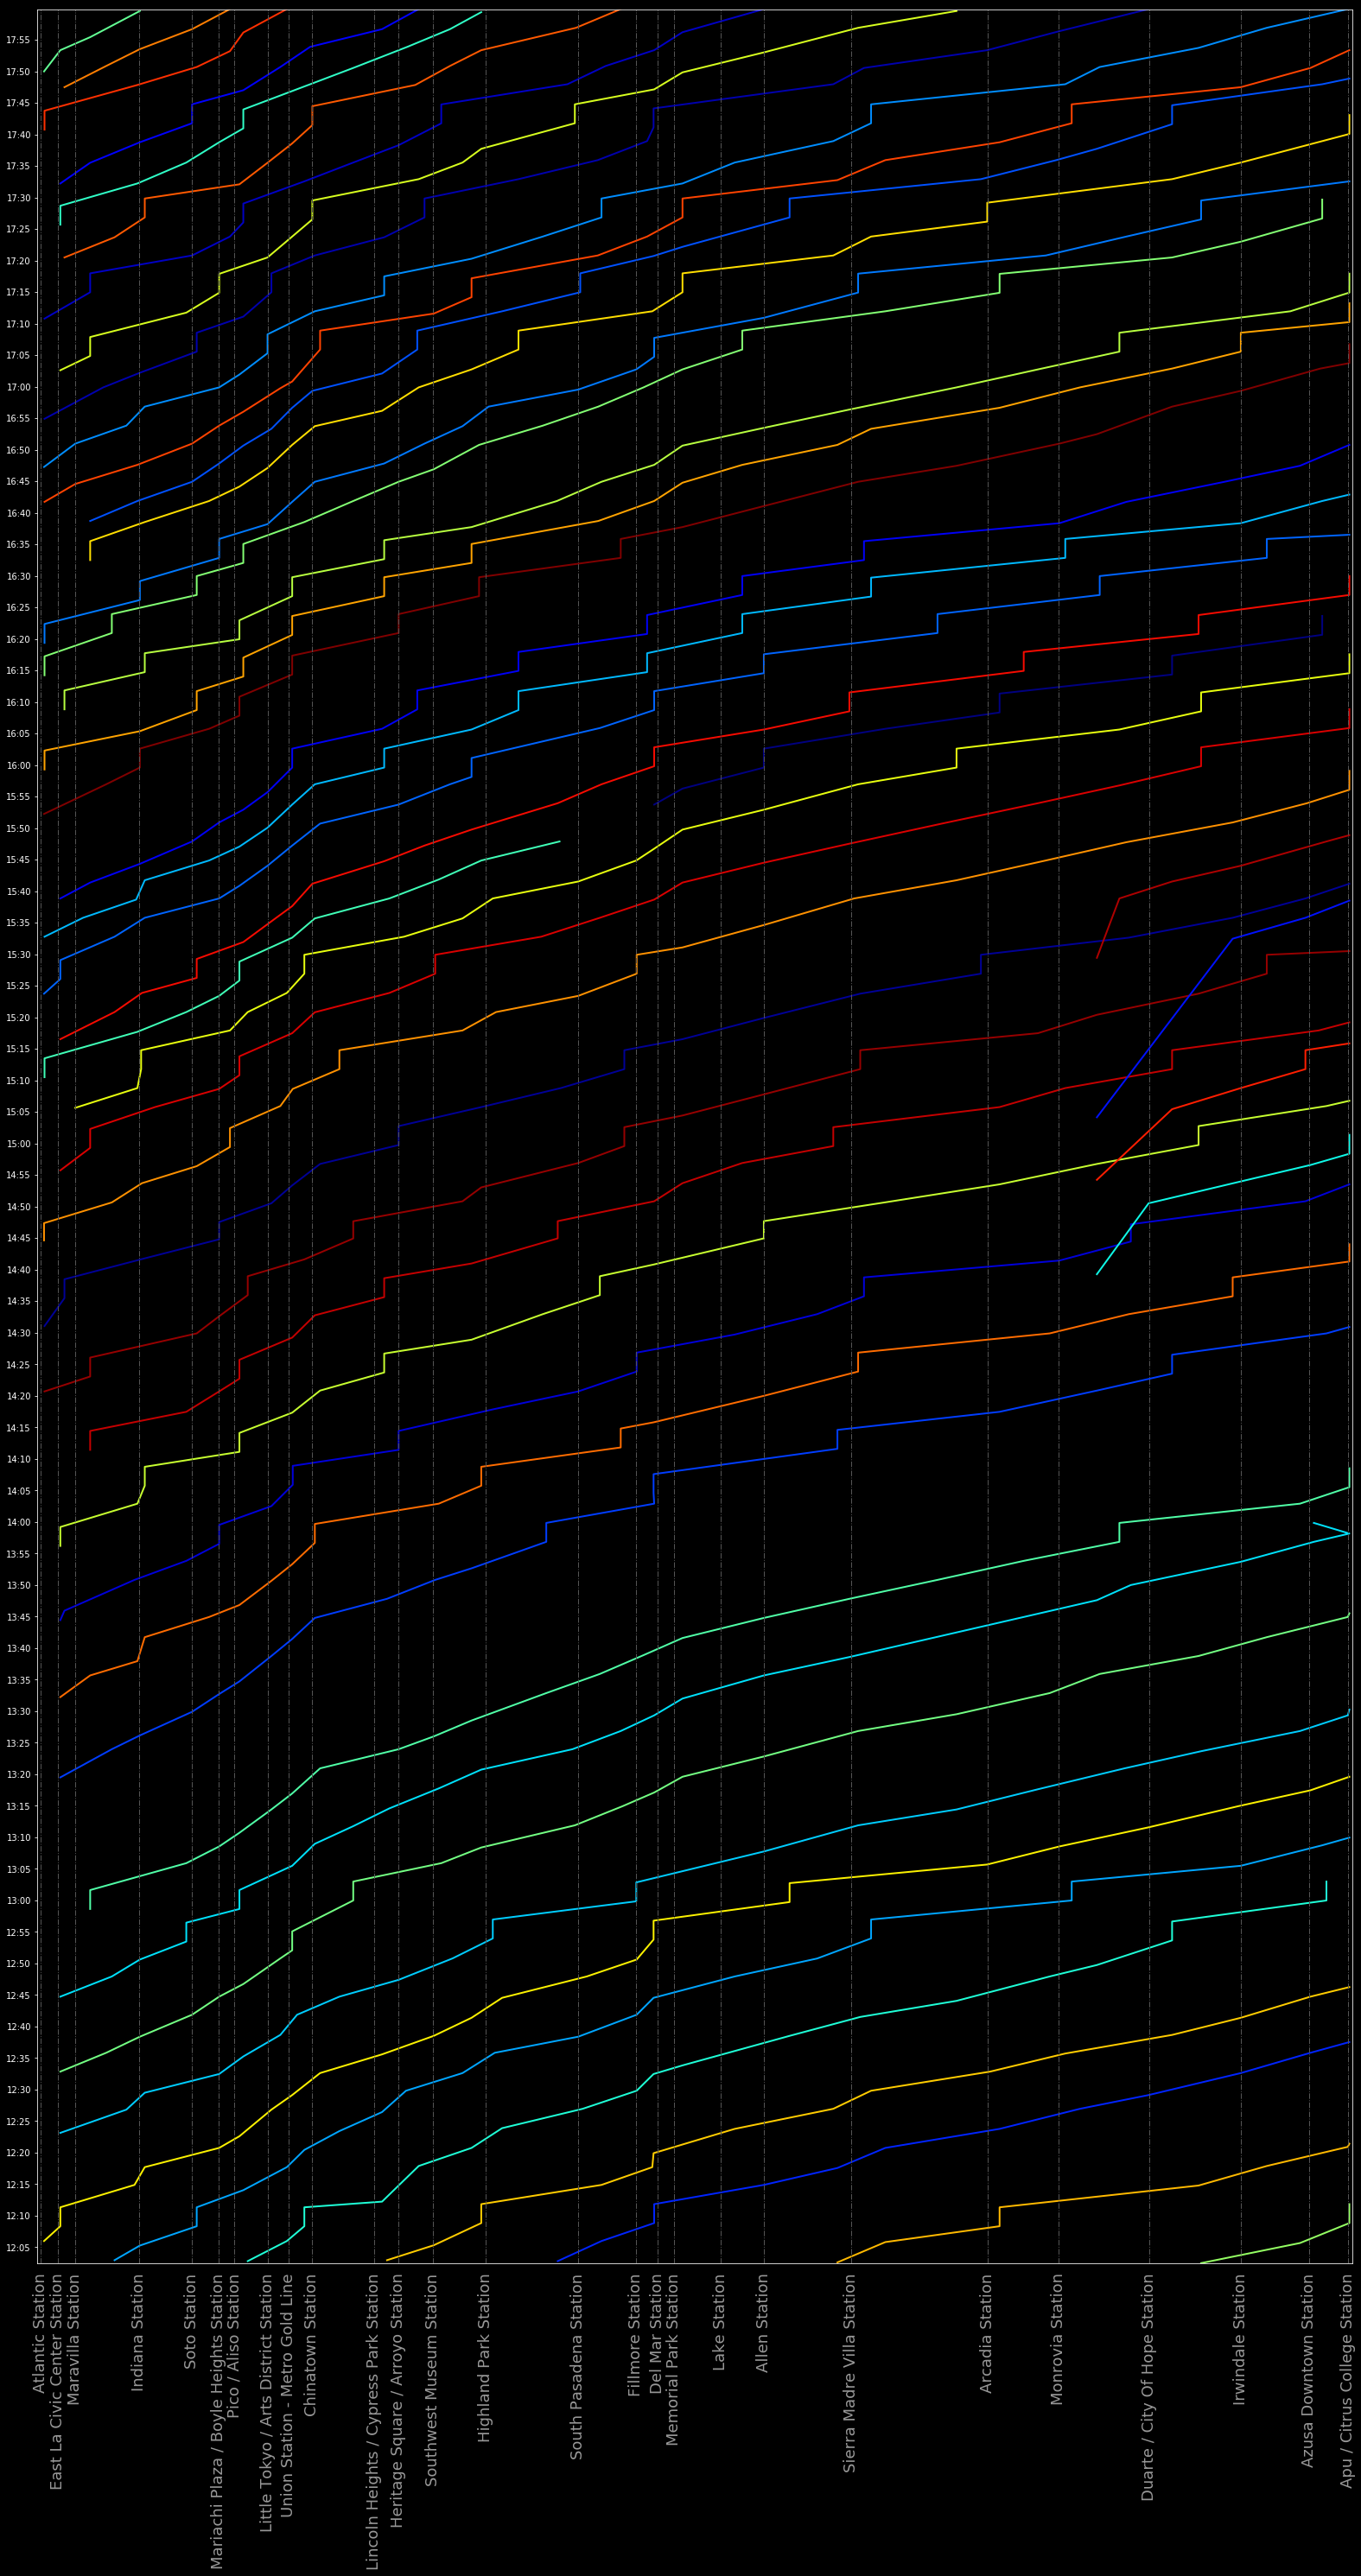

In [15]:
northPlot.plot()

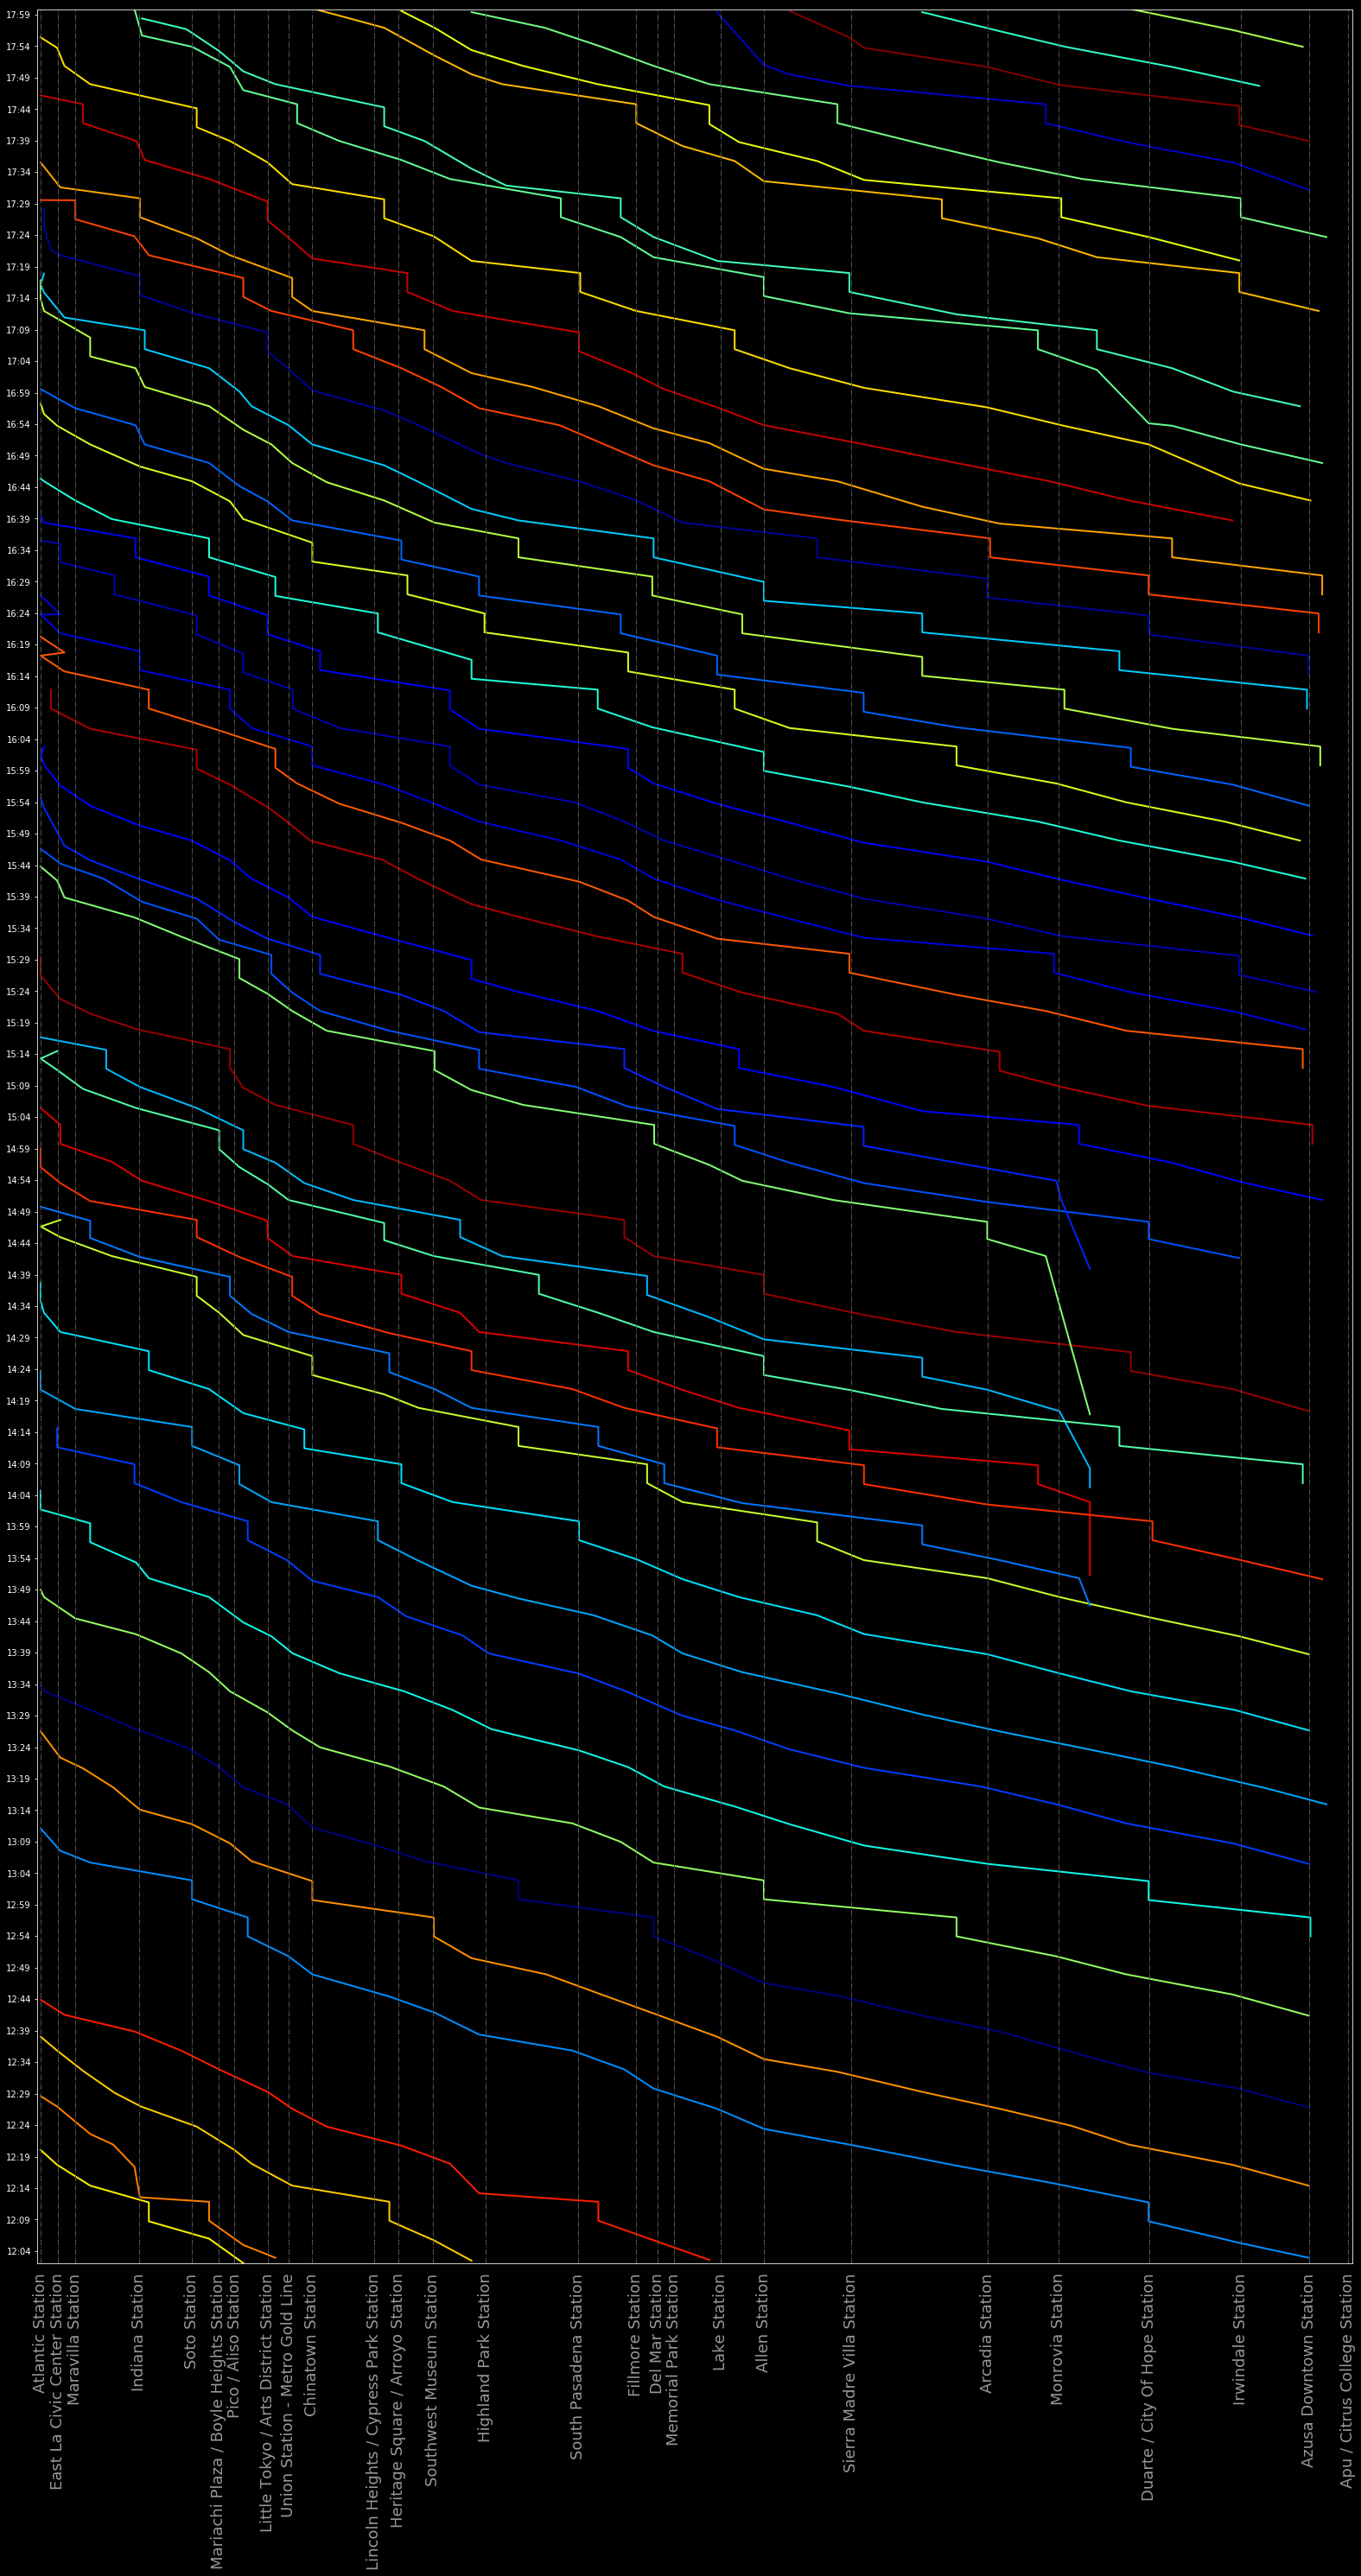

In [16]:
southPlot.plot()